In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
cars = pd.read_csv('/Users/kuba.figura/CS2025/computational_intelligence/car+evaluation/car.data', names =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred'])

In [3]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,pred
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cars.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
pred        0
dtype: int64

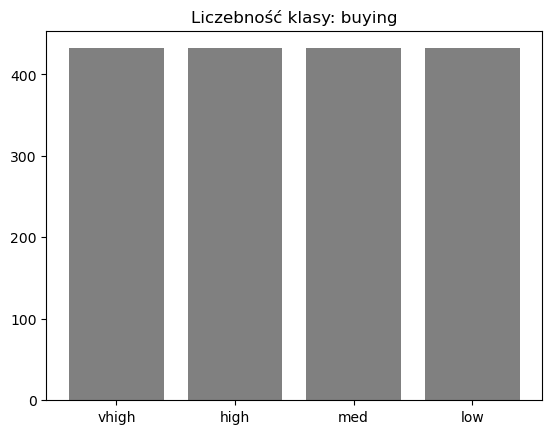

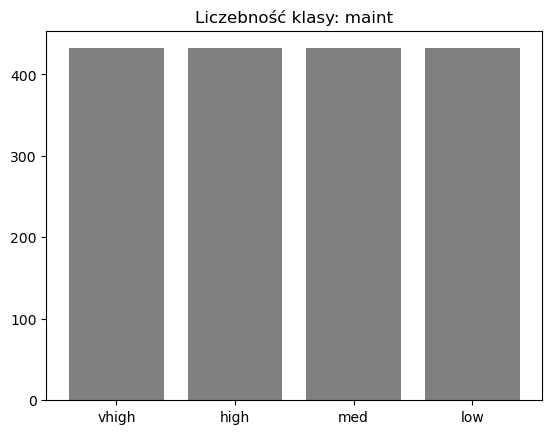

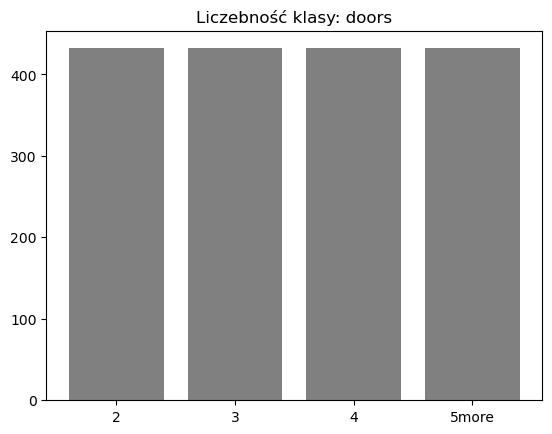

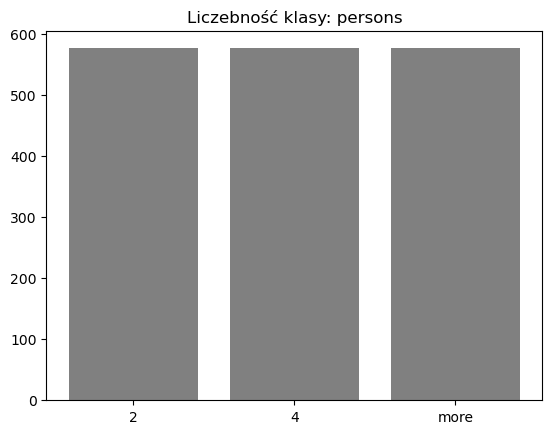

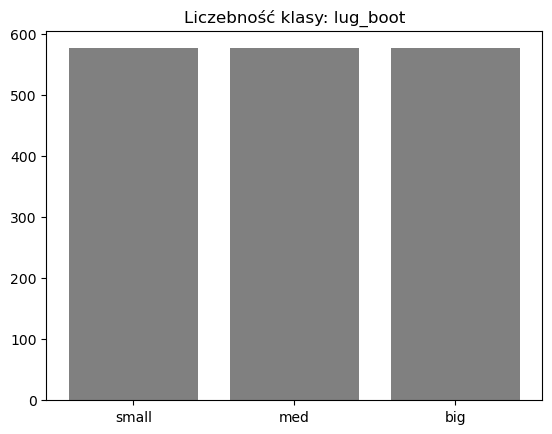

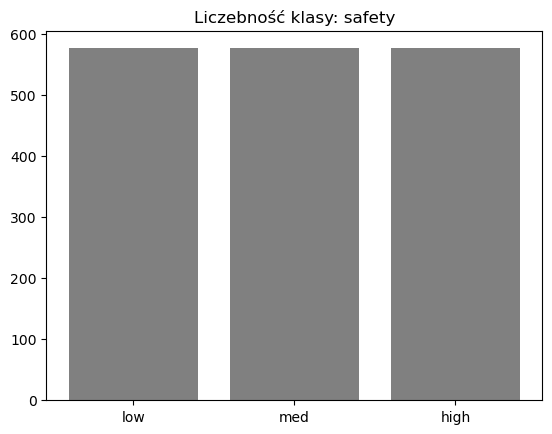

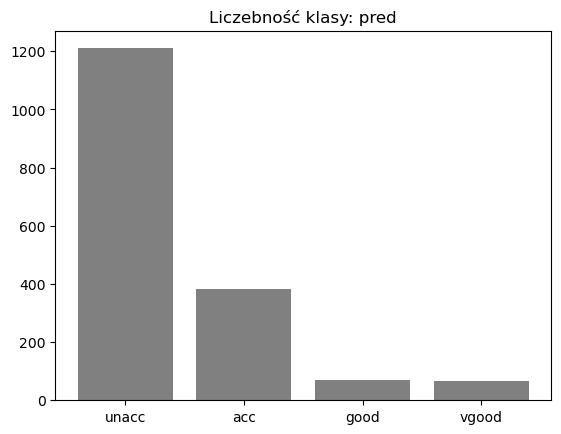

In [5]:
labels = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred']
for label in labels:
    plt.bar(cars[label].value_counts().index, cars[label].value_counts().values, color = "grey")
    plt.title(f"Liczebność klasy: {label}")
    plt.show()

# Wstępna eksploracja
W zbiorze Cars mamy znowu do czynienia z niezrównowzonymi klasami. Trzeba będzie zastosować podobne strategie jak w danych dotyczących złobków.

In [6]:
for label in labels:
    print(f"Wartości w klasie {label}: {cars[label].unique()}")

Wartości w klasie buying: ['vhigh' 'high' 'med' 'low']
Wartości w klasie maint: ['vhigh' 'high' 'med' 'low']
Wartości w klasie doors: ['2' '3' '4' '5more']
Wartości w klasie persons: ['2' '4' 'more']
Wartości w klasie lug_boot: ['small' 'med' 'big']
Wartości w klasie safety: ['low' 'med' 'high']
Wartości w klasie pred: ['unacc' 'acc' 'vgood' 'good']


In [7]:
from sklearn.preprocessing import OrdinalEncoder

buying = ['vhigh', 'high', 'med', 'low']
buying_r = buying[::-1]
maint = ['vhigh', 'high', 'med', 'low']
maint_r = maint[::-1]
doors = ['2', '3', '4', '5more']
persons = ['2', '4', 'more']
lug_boot = ['small', 'med', 'big']
safety = ['low', 'med', 'high']
pred = ['unacc', 'acc', 'good', 'vgood']
ordinal_encoder = OrdinalEncoder(categories=[buying_r, maint_r, doors, persons, lug_boot, safety, pred])

cars[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred']] = ordinal_encoder.fit_transform(cars[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred']])


In [9]:
for idx, feature in enumerate(labels):
    categories = ordinal_encoder.categories_[idx]
    print(f"\n{feature.upper()}:")
    print("-" * 40)
    for encoded_value, original_value in enumerate(categories):
        print(f"  {original_value:<15} -> {encoded_value}")

print("\n" + "=" * 60)


BUYING:
----------------------------------------
  low             -> 0
  med             -> 1
  high            -> 2
  vhigh           -> 3

MAINT:
----------------------------------------
  low             -> 0
  med             -> 1
  high            -> 2
  vhigh           -> 3

DOORS:
----------------------------------------
  2               -> 0
  3               -> 1
  4               -> 2
  5more           -> 3

PERSONS:
----------------------------------------
  2               -> 0
  4               -> 1
  more            -> 2

LUG_BOOT:
----------------------------------------
  small           -> 0
  med             -> 1
  big             -> 2

SAFETY:
----------------------------------------
  low             -> 0
  med             -> 1
  high            -> 2

PRED:
----------------------------------------
  unacc           -> 0
  acc             -> 1
  good            -> 2
  vgood           -> 3

